In [1]:
#Import pycaret
from pycaret.classification import *
import pandas as pd

In [2]:
df=pd.read_csv('Data.csv')


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 681456 entries, 0 to 681455
Data columns (total 21 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   PRODUCT_CODE                659606 non-null  object 
 1   DOC                         681456 non-null  object 
 2   EXPIRY_DATE                 681456 non-null  object 
 3   PRODUCT_TYPE                681456 non-null  object 
 4   TERMINATION_EFFECTIVE_DATE  623016 non-null  object 
 5   TERM                        681456 non-null  int64  
 6   PREMIUM_AMOUNT              681395 non-null  float64
 7   SA                          681456 non-null  float64
 8   STATUS_NAME                 681456 non-null  object 
 9   PREMIUM_STATUS              681456 non-null  object 
 10  PREMIUM_FREQUENCY           681456 non-null  object 
 11  MODE_NAME                   681456 non-null  object 
 12  GENDER                      681456 non-null  object 
 13  MARITAL_STATUS

In [4]:
#remove date collumns
# convert the 'Date' column to datetime format
df['TERMINATION_EFFECTIVE_DATE']= pd.to_datetime(df['TERMINATION_EFFECTIVE_DATE'])
df['BIRTHDAY']= pd.to_datetime(df['BIRTHDAY'])
df['DOC']= pd.to_datetime(df['DOC'])


#Etract the age from  birth year
#soucrce: https://stackoverflow.com/questions/2217488/age-from-birthdate-in-python
from datetime import date

def calculate_age(born):
    #today = date.today()
    twenty20 = date(2020, 12, 30)
    return twenty20.year - born.year - ((twenty20.month, twenty20.day) < (born.month, born.day))




#Calculate the policy age

df['Policy_Age'] = df['DOC'].apply(calculate_age)
df['Policy_holder_Age'] = df['BIRTHDAY'].apply(calculate_age)

df = df[df.columns.difference(['DOC', 'BIRTHDAY','TERMINATION_EFFECTIVE_DATE','EXPIRY_DATE'])]


In [5]:
df.head()

,AGENT_PERSISTENCY,CLAWBACK_COMMISSION,EDUCATION,GENDER,INCOME,MARITAL_STATUS,MODE_NAME,PREMIUM_AMOUNT,PREMIUM_FREQUENCY,PREMIUM_STATUS,PRODUCT_CODE,PRODUCT_TYPE,Policy_Age,Policy_holder_Age,SA,SALES_CHANNEL,STATUS_NAME,TERM,TERMINATION_REASON
0,86.41,-114.769811,Others,M,111600.0,Single,GSO,302.39,Monthly,Regular,BMFW-1,Risk,12,55,13439.160,Tied,Terminated,7991,FINANCIAL
1,90.25,-83.140400,Others,F,60396.0,Single,DDE,307.74,Monthly,Regular,BMFW-1,Risk,14,47,22689.950,Broker,Lapsed,7992,NaN
2,0.00,0.000000,Others,M,48108.0,Married,GSO,276.58,Monthly,Regular,BMFW-1,Risk,14,65,15938.480,Tied,Terminated,7992,FINANCIAL
3,86.62,-105.602085,Others,M,24000.0,Single,Cash,207.73,Monthly,Regular,BMFW-1,Risk,11,42,11940.525,Tied,Lapsed,7990,NaN
4,82.86,-30.271900,Others,M,55632.0,Married,ESO(Electronic),198.43,Monthly,Regular,BMFW-1,Risk,13,55,12298.740,Broker,Terminated,7992,FINANCIAL


In [6]:
#Shuffle data
df = df.sample(frac=1).reset_index(drop=True)

In [7]:
df.head()
df.shape

(681456, 19)

In [8]:
#Dropt 'Termination reason collumn as it gives away the class'
df.drop(df[df['STATUS_NAME'] == 'Waiting for Validate'].index, inplace = True)

In [9]:
df.shape

(681450, 19)

In [10]:
#Check if the waiting for validate has been removed
df.STATUS_NAME.unique()

array(['Lapsed', 'Inforce', 'Terminated'], dtype=object)

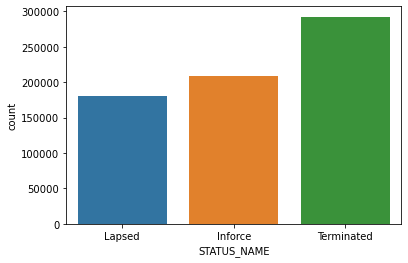

In [11]:
#Simple count plot for class balance inestigation
import seaborn as sns
ax = sns.countplot(x="STATUS_NAME", data=df)

The above plot shows more policies have been terminated foe the data 2014 to 2020.

Data set currently seats at 600k rows. This might be too expensive for computation.
Maybe sampling the data would help reduce that.


In [12]:
#random sample
df2=df.sample(n=50000,replace="False")
df2.shape

(50000, 19)

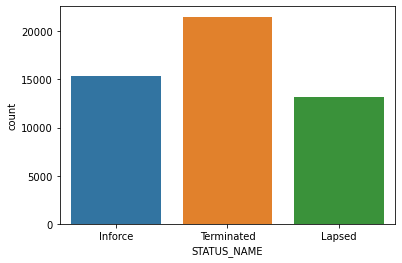

In [13]:
#Check class balance of the sample
#Simple count plot for class balance inestigation
import seaborn as sns
ax = sns.countplot(x="STATUS_NAME", data=df2)

In [14]:
#drop the termination reason
df2=df2.drop(['TERMINATION_REASON'], axis=1)

In [18]:
#Assume Terminated=Lapsed
df2['STATUS_NAME'] = df2['STATUS_NAME'].str.replace('Terminated','Lapsed')

In [15]:
import gplearn

In [21]:
from gplearn.genetic import SymbolicClassifier

In [22]:
classsifier=SymbolicClassifier()

Seems reasonable to proceed.

In [19]:
#Set up an experiement
exp=setup(df2,target='STATUS_NAME')

,Description,Value
0,session_id,6272
1,Target,STATUS_NAME
2,Target Type,Binary
3,Label Encoded,"Inforce: 0, Lapsed: 1"
4,Original Data,"(50000, 18)"
5,Missing Values,True
6,Numeric Features,8
7,Categorical Features,9
8,Ordinal Features,False
9,High Cardinality Features,False


In [24]:
#gplearn model
SR=create_model(classsifier)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.6926,0.6771,1.0000,0.6926,0.8184,0.0000,0.0000
1,0.7157,0.5504,0.9802,0.7149,0.8268,0.1313,0.2120
2,0.7131,0.7009,0.9794,0.7133,0.8254,0.1220,0.1992
3,0.7437,0.7817,0.9538,0.7464,0.8375,0.2721,0.3248
4,0.6820,0.7089,0.7288,0.7948,0.7604,0.2904,0.2928
5,0.6786,0.6932,0.8605,0.7260,0.7875,0.1468,0.1561
6,0.5949,0.6676,0.4870,0.8708,0.6247,0.2544,0.3075
7,0.6923,0.5878,1.0000,0.6923,0.8182,0.0000,0.0000
8,0.7266,0.6893,0.9893,0.7203,0.8336,0.1628,0.2665
9,0.6911,0.7028,0.9971,0.6923,0.8172,-0.0014,-0.0094


Note that there are about 50 parameters we can tune here as pre-processing step prior to modelling

In [26]:
evaluate_model(SR)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…